In [1]:
%matplotlib inline
%run 'bin/notebook_utils.py'

In [2]:
cont_csv = '../rawdata/scheduling/scheduler_cont_4096.2/pilot.0000/agent_1.scheduling.0.child.prof'
homb_csv = '../rawdata/scheduling/scheduler_hombre_4096.7/pilot.0000/agent_1.scheduling.0.child.prof'

cont_df = pd.read_csv(cont_csv)
homb_df = pd.read_csv(homb_csv)

cont_get_df = cont_df.loc[cont_df['event'] == 'get']
homb_get_df = homb_df.loc[homb_df['event'] == 'get']

cont_try_df = cont_df.loc[cont_df['event'] == 'schedule_try']
homb_try_df = homb_df.loc[homb_df['event'] == 'schedule_try']

cont_ok_df  = cont_df.loc[cont_df['event'] == 'schedule_ok']
homb_ok_df  = homb_df.loc[homb_df['event'] == 'schedule_ok']

cont_put_df = cont_df.loc[cont_df['event'] == 'publish']
homb_put_df = homb_df.loc[homb_df['event'] == 'publish']

cont_unit   = cont_df.loc[cont_df['uid'] == 'unit.000000']
homb_unit   = homb_df.loc[homb_df['uid'] == 'unit.000000']

cont_put_delay = cont_unit.loc[cont_unit['event'] == 'publish'    ]['#time'].values[0] - \
                 cont_unit.loc[cont_unit['event'] == 'schedule_ok']['#time'].values[0]

homb_put_delay = homb_unit.loc[homb_unit['event'] == 'publish'    ]['#time'].values[0] - \
                 homb_unit.loc[homb_unit['event'] == 'schedule_ok']['#time'].values[0]

print cont_put_delay
print homb_put_delay

print len(homb_get_df),
print len(homb_try_df),
print len(homb_ok_df),
print len(homb_put_df)

print len(cont_get_df),
print len(cont_try_df),
print len(cont_ok_df),
print len(cont_put_df)


0.000499963760376
0.00059986114502
4096 4096 4096 1
4096 4096 4096 1


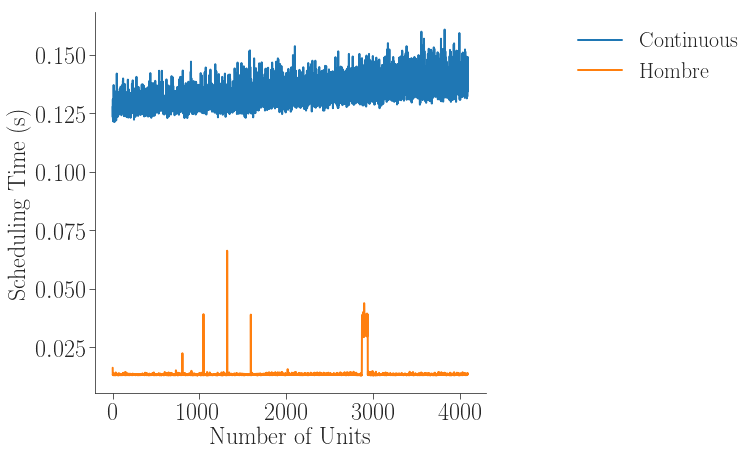

In [3]:
fig, ax  = fig_setup(figsize=(7,7))
ssize    = 4096

homb_data = list()
cont_data = list()
idx       = list()
i         = 0
for cont_try, cont_ok, homb_try, homb_ok in zip(cont_try_df.iterrows(), cont_ok_df.iterrows(), \
                                                homb_try_df.iterrows(), homb_ok_df.iterrows()):
    cont_data.append(cont_ok[1]['#time'] - cont_try[1]['#time'])
    homb_data.append(homb_ok[1]['#time'] - homb_try[1]['#time'])
    idx.append(i)
    i += 1

plt.plot(idx, cont_data)
plt.plot(idx, homb_data)

plt.legend(loc='upper right', bbox_to_anchor=(1.7,1), labels=['Continuous', 'Hombre'])
plt.xlabel('Number of Units')
plt.ylabel('Scheduling Time (s)')

plt.savefig('figures/paper_titan_rp_scheduler_overheads.pdf', dpi=300, bbox_inches='tight')

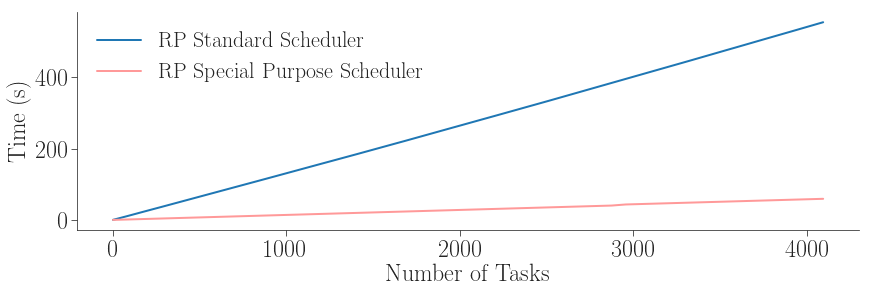

In [4]:
fig, ax  = fig_setup(figsize=(14,4))
ssize    = 4096

homb_data = list()
cont_data = list()
idx       = list()
i         = 0
for cont_get, cont_ok, homb_get, homb_ok in zip(cont_get_df.iterrows(), cont_ok_df.iterrows(), \
                                                homb_get_df.iterrows(), homb_ok_df.iterrows()):
    cont_data.append(cont_ok[1]['#time'] - cont_get[1]['#time'] + cont_put_delay*i)
    homb_data.append(homb_ok[1]['#time'] - homb_get[1]['#time'] + cont_put_delay*i)
    idx.append(i)
    i += 1

plt.plot(idx, cont_data)
plt.plot(idx, homb_data, color=tableau20[7])

plt.legend(# loc='upper right', bbox_to_anchor=(1.7,1), 
    labels=['RP Standard Scheduler', 'RP Special Purpose Scheduler'])
plt.xlabel('Number of Tasks')
plt.ylabel('Time (s)')

plt.savefig('figures/paper_titan_rp_scheduler_overheads.pdf', dpi=300, bbox_inches='tight')